In [202]:
#VERİ SETİ HİKAYESİ VE YAPISININ İNCELENMESİ

In [203]:
import seaborn as sns
import pandas as pd

In [204]:
planets = sns.load_dataset("planets")
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [205]:
#veri setinin hikayesi nedir ? 
#nasanın yayınladığı galaksi keşif verisetidir
#method galaksilerin bulunma şekli
#number sistemlerdeki gezegen sayısı
#orbital period yörünge dönemi temsile eder
#mass kütleyi temsil eder m.sin
#distance uzaklık temsil eder
#year keşif tarihi temsil eder

In [206]:
df = planets.copy()#ilk olarak yedek alın

In [207]:
df.info()#veri seti yapısal bigileri ara 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   object 
 1   number          1035 non-null   int64  
 2   orbital_period  992 non-null    float64
 3   mass            513 non-null    float64
 4   distance        808 non-null    float64
 5   year            1035 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


In [208]:
#object kategorik değişkendir - float sürekli - int kesikli 

In [209]:
#object tipini kategorik değişkene çeviriyoruz

In [210]:
df.method = pd.Categorical(df.method)

In [211]:
df.dtypes

method            category
number               int64
orbital_period     float64
mass               float64
distance           float64
year                 int64
dtype: object

In [212]:
#VERİ SETİNİN BETİMLENMESİ

In [213]:
df.shape

(1035, 6)

In [214]:
df.columns

Index(['method', 'number', 'orbital_period', 'mass', 'distance', 'year'], dtype='object')

In [215]:
df.describe().T#eksik gözlemleri göz arda eder ve kategorik değişkenleri dışarda bırakır

,count,mean,std,min,25%,50%,75%,max
number,1035.0,1.785507,1.240976,1.000000,1.00000,1.0000,2.000,7.0
orbital_period,992.0,2002.917596,26014.728304,0.090706,5.44254,39.9795,526.005,730000.0
mass,513.0,2.638161,3.818617,0.003600,0.22900,1.2600,3.040,25.0
distance,808.0,264.069282,733.116493,1.350000,32.56000,55.2500,178.500,8500.0
year,1035.0,2009.070531,3.972567,1989.000000,2007.00000,2010.0000,2012.000,2014.0


In [216]:
#EKSİK DEĞERLERİN İNCELENMESİ

In [217]:
df = planets.copy()
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [218]:
#hiç eksik gözlem var mı
df.isnull().values.any()

True

In [219]:
#hangi değişkende kaçar tane var
df.isnull().sum()#orbitaldeki eksiklik nasıl ortaya çıktığı incelenmesi

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

In [220]:
df["orbital_period"].fillna(0, inplace = True)

In [221]:
df.isnull().sum()#yok olur null yerine 0 değerleri koyulur eksik değer konusu hassas konudur eksiklik bir çok anlama gelir
#numberda eksiklik olsa yapısal bir hata olur bu boş olanları doldurmalar tehlikelidir

method              0
number              0
orbital_period      0
mass              522
distance          227
year                0
dtype: int64

In [222]:
df["mass"].fillna(df.mass.mean(), inplace = True)#boş alanları ortalama değerle doldurur

In [223]:
df.isnull().sum()

method              0
number              0
orbital_period      0
mass                0
distance          227
year                0
dtype: int64

In [224]:
df.fillna(df.mass.mean(), inplace = True)#tüm boşların yerine ortalama yazar

In [225]:
df.isnull().sum()#yapı bozulduğundan yedeğe geri döneriz

method            0
number            0
orbital_period    0
mass              0
distance          0
year              0
dtype: int64

In [226]:
df = planets.copy()
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [227]:
df.isnull().sum()#eski haline geri döner

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

In [228]:
#KATEGORİ DEĞİŞKENLER

In [229]:
planets = sns.load_dataset("planets")
df = planets.copy()
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [230]:
kat_df = df.select_dtypes(include = ["object"])

In [231]:
kat_df.head()

,method
0,Radial Velocity
1,Radial Velocity
2,Radial Velocity
3,Radial Velocity
4,Radial Velocity


In [232]:
kat_df.method.unique()#kategori değişkeninin sınıflarına erişmek

array(['Radial Velocity', 'Imaging', 'Eclipse Timing Variations',
       'Transit', 'Astrometry', 'Transit Timing Variations',
       'Orbital Brightness Modulation', 'Microlensing', 'Pulsar Timing',
       'Pulsation Timing Variations'], dtype=object)

In [233]:
kat_df.method.value_counts().count()#kategori değişkeninin sınıf sayısına erişmek

10

In [234]:
kat_df.method.value_counts()#kategorik değişkenin sınıflarının frekanslarına erişmek

Radial Velocity                  553
Transit                          397
Imaging                           38
Microlensing                      23
Eclipse Timing Variations          9
Pulsar Timing                      5
Transit Timing Variations          4
Orbital Brightness Modulation      3
Astrometry                         2
Pulsation Timing Variations        1
Name: method, dtype: int64

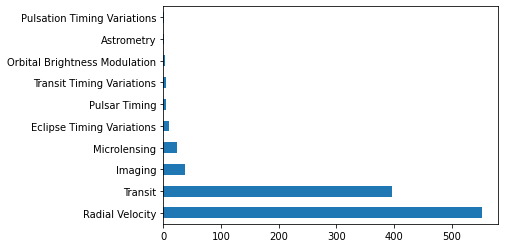

In [235]:
df["method"].value_counts().plot.barh();#elimizdeki veri setini dönüştürüp görselleştirdik

In [236]:
#barh() sütun grafiği

In [237]:
#SÜREKLİ DEĞİŞKEN

In [238]:
df_num = df.select_dtypes(include = ["float64", "int64"])

In [239]:
df_num.head()

,number,orbital_period,mass,distance,year
0,1,269.300,7.10,77.40,2006
1,1,874.774,2.21,56.95,2008
2,1,763.000,2.60,19.84,2011
3,1,326.030,19.40,110.62,2007
4,1,516.220,10.50,119.47,2009


In [240]:
df_num.distance.describe()

count     808.000000
mean      264.069282
std       733.116493
min         1.350000
25%        32.560000
50%        55.250000
75%       178.500000
max      8500.000000
Name: distance, dtype: float64

In [241]:
print("Ortalama:"+ str(df_num.distance.mean()))
print("Dolu Gözlem Sayısı:"+ str(df_num.distance.count()))
print("Maksimum Değer:"+ str(df_num.distance.max()))
print("Minimum Deger:"+ str(df_num.distance.min()))
print("Medyan:"+ str(df_num.distance.median()))
print("Standart Sapma:"+ str(df_num.distance.std()))

Ortalama:264.06928217821786
Dolu Gözlem Sayısı:808
Maksimum Değer:8500.0
Minimum Deger:1.35
Medyan:55.25
Standart Sapma:733.1164929404421


In [242]:
#Dağılım Grafikleri büyük resmi görmek için

In [243]:
#sütun grafikler elimizdeki kategorik değişkenleri görselleştirmek için kullanılır

In [244]:
#Veri Seti Hikayesi
'''
pırlantalar ile ilgili veri seti
price: fiyat (326-18823)
carat: ağırlık (0.2-5.01)
cut: kalite (Fair, Good, Very Good, Premium, Ideal)
color: renk (J(worst) TO D(best))
clarity: temizliği (I1(worst) SI2 SI1 VS2 VS1 VVS2 VVS1 IF(best))
x:Lenght
y:Width
z:Depth
depth:toplam derinlik= z/mean(x,y) = 2*z/(x+y) (43-79)
table: elmasın en geniş noktasına göre genişliği (43-95)
'''

'\npırlantalar ile ilgili veri seti\nprice: fiyat (326-18823)\ncarat: ağırlık (0.2-5.01)\ncut: kalite (Fair, Good, Very Good, Premium, Ideal)\ncolor: renk (J(worst) TO D(best))\nclarity: temizliği (I1(worst) SI2 SI1 VS2 VS1 VVS2 VVS1 IF(best))\nx:Lenght\ny:Width\nz:Depth\ndepth:toplam derinlik= z/mean(x,y) = 2*z/(x+y) (43-79)\ntable: elmasın en geniş noktasına göre genişliği (43-95)\n'

In [245]:
diamonds = sns.load_dataset("diamonds")
df = diamonds.copy()
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [246]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [247]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


In [248]:
#price verisi nasıl elde edildiğini keşifçi veri analizi ile arayacağız

In [249]:
df.cut.value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [250]:
df.color.value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [251]:
df.clarity.value_counts()

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

In [252]:
#ordinal tanımlama
#kötüden iyiye gittiğini programa tanıtmalıyız
from pandas.api.types import CategoricalDtype

In [253]:
df.cut.head()#ordinal tanımlama yapalım

0      Ideal
1    Premium
2       Good
3    Premium
4       Good
Name: cut, dtype: category
Categories (5, object): ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']

In [254]:
df.cut = df.cut.astype(CategoricalDtype(ordered = True))#tipini kategorik değişkene dönüştür

In [255]:
df.cut.head(1)#veri setinin hikayesine uygun sıralanmadı

0    Ideal
Name: cut, dtype: category
Categories (5, object): ['Ideal' < 'Premium' < 'Very Good' < 'Good' < 'Fair']

In [256]:
cut_kategoriler = ["Fair","Good","Very Good","Premium","Ideal"]#sıralamayı bir diziye atarız

In [257]:
df.cut = df.cut.astype(CategoricalDtype(categories = cut_kategoriler, ordered = True))

In [258]:
df.cut.head(1)#veri seti hikayesine uygun bi şekilde geldi

0    Ideal
Name: cut, dtype: category
Categories (5, object): ['Fair' < 'Good' < 'Very Good' < 'Premium' < 'Ideal']

In [259]:
#zor kısımlar detaylardaki zorluklaru gidermek makine öğrenmesindeki kısımlara daha kolay
#bilimsel bir şekilde halletmeliyiz veri setlerinin hikayelerini çok iyi şekilde bilmeliyiz

In [260]:
df.color.head()

0    E
1    E
2    E
3    I
4    J
Name: color, dtype: category
Categories (7, object): ['D', 'E', 'F', 'G', 'H', 'I', 'J']

In [261]:
color_kategori = ["D","E","F","G","H","I","J"] 

In [262]:
df.color = df.color.astype(CategoricalDtype(categories = color_kategori, ordered = True))

In [263]:
df.color.head(1)

0    E
Name: color, dtype: category
Categories (7, object): ['D' < 'E' < 'F' < 'G' < 'H' < 'I' < 'J']

In [264]:
df.clarity.head()

0    SI2
1    SI1
2    VS1
3    VS2
4    SI2
Name: clarity, dtype: category
Categories (8, object): ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1']

In [265]:
clarity_kategori = ["I1","SI1","SI2","VS2","VS1","VVS2","VVS1","IF"]

In [266]:
df.clarity = df.clarity.astype(CategoricalDtype(categories = clarity_kategori, ordered = True))

In [267]:
df.clarity.head()

0    SI2
1    SI1
2    VS1
3    VS2
4    SI2
Name: clarity, dtype: category
Categories (8, object): ['I1' < 'SI1' < 'SI2' < 'VS2' < 'VS1' < 'VVS2' < 'VVS1' < 'IF']

In [268]:
#barplot

In [269]:
#cut değişkeninin frekanslarını görselleştirelim

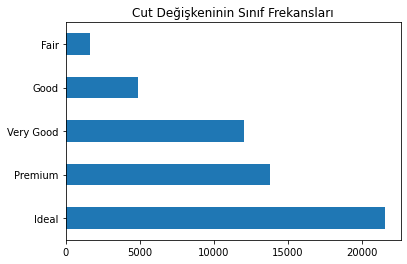

In [270]:
df.cut.value_counts().plot.barh().set_title("Cut Değişkeninin Sınıf Frekansları");

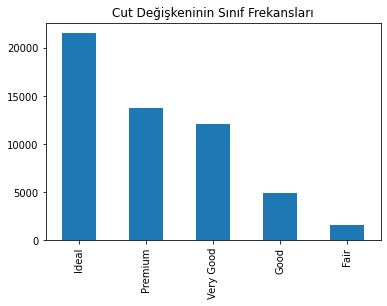

In [271]:
(df.cut
 .value_counts()
 .plot.bar()
 .set_title("Cut Değişkeninin Sınıf Frekansları"));#pandas ile görselleştirme

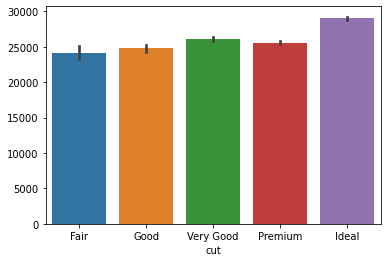

In [272]:
sns.barplot(x = "cut",y = df.cut.index, data = df);#x eksenine kategorik değişkenini koy

In [273]:
#Sütun Grafik Çaprazlamalar

In [274]:
#veriseti içindeki verilerin beraber değerlendirilmesi , kırılımları göz önünde bulundurma , değişkenlerin etkilerinin bir arada değerlendirmek

In [275]:
diamonds = sns.load_dataset("diamonds")
df = diamonds.copy()
cut_kategoriler = ["Fair","Good","Very Good","Premium","Ideal"]
df.cut = df.cut.astype(CategoricalDtype(categories = cut_kategoriler, ordered = True))
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [276]:
#cut kategori değişkeni ile price sayısal değişkenini çaprazlayalım

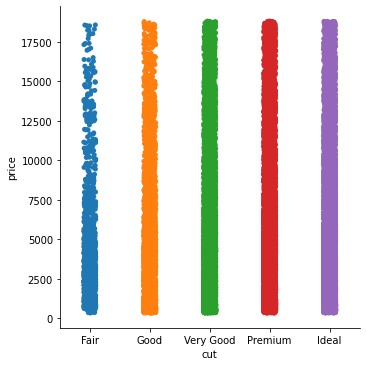

In [277]:
sns.catplot(x = "cut", y = "price", data = df);

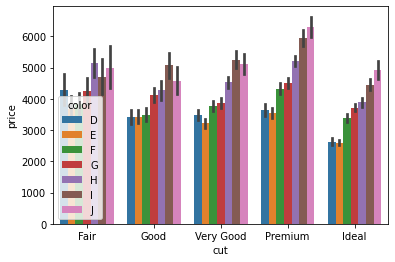

In [278]:
sns.barplot(x = "cut", y = "price", hue = "color", data = df);#daha fazla açıklanabilirlik katarız 
#ulaştığımız bu resme nasıl doğrularız

In [279]:
df.groupby(["cut","color"])["price"].mean()#iki kategorik değişkeni kırılma yaparız priceye göre ortalama al
#tablodaki değerler aşağıdaki ile aynıysa doğrulamış oluruz

cut        color
Fair       D        4291.061350
           E        3682.312500
           F        3827.003205
           G        4239.254777
           H        5135.683168
           I        4685.445714
           J        4975.655462
Good       D        3405.382175
           E        3423.644159
           F        3495.750275
           G        4123.482204
           H        4276.254986
           I        5078.532567
           J        4574.172638
Very Good  D        3470.467284
           E        3214.652083
           F        3778.820240
           G        3872.753806
           H        4535.390351
           I        5255.879568
           J        5103.513274
Premium    D        3631.292576
           E        3538.914420
           F        4324.890176
           G        4500.742134
           H        5216.706780
           I        5946.180672
           J        6294.591584
Ideal      D        2629.094566
           E        2597.550090
           F        337

In [280]:
#Histogram ve Yoğunluk Grafiğinin Oluşturulması

In [281]:
df = diamonds.copy()

In [282]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


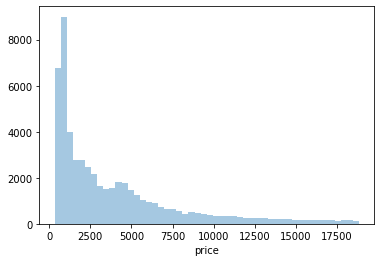

In [283]:
sns.distplot(df.price, kde = False);#dağılım görselleştirmek için kullanılır 
#kde = yoğunluk fonksiyonu ayarı

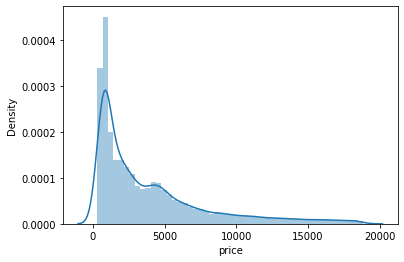

In [284]:
sns.distplot(df.price);#

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


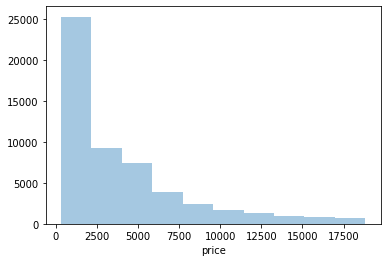

In [285]:
sns.distplot(df.price, bins = 10, kde = False);#çubuk sayısı

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


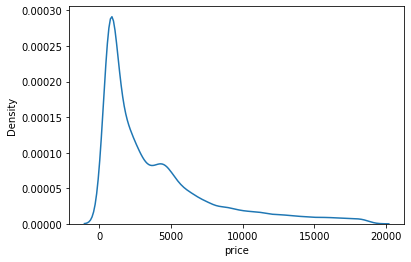

In [286]:
sns.distplot(df.price, hist = False);

<AxesSubplot:xlabel='price', ylabel='Density'>

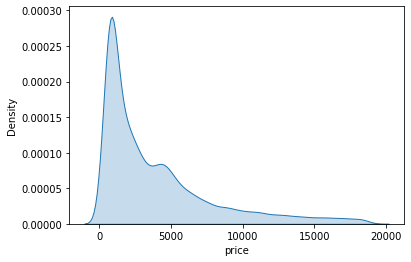

In [287]:
sns.kdeplot(df.price, shade = True)#yoğınluk

In [288]:
#Histogram ve Yoğunluk Çaprazlamalar (ÇOK ÖNEMLİ)

<AxesSubplot:xlabel='price', ylabel='Density'>

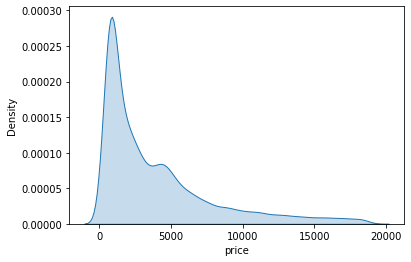

In [289]:
sns.kdeplot(df.price, shade = True)#fiyat dağılımı grafiğin bizden sakladığı kısımları çaprazlamalarla buluruz

In [290]:
#bağımlı değişkenlerde hassas olmalıyız - araçların fiyatı bağımlı değişkendir hedeflediğimiz değerlere denir (Odaklandığımız değişken)

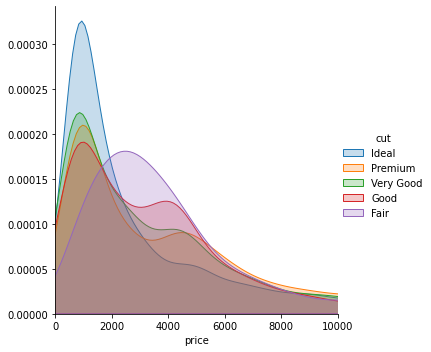

In [291]:
sns.FacetGrid(df, hue = "cut", height = 5, xlim = (0,10000)).map(sns.kdeplot, "price", shade = True).add_legend()#bölerek yazdırmamızı sağlar
#x y ile boyut verebiliyoruz
#yoğunlık grafiği oluşturucaz fakat üzerine boyut ekliyeceğiz
#cut değerini map fonk ile eşleriz

In [292]:
#tek başına incelenirse yanıltabilir bundan dolayı çapraz grafiklere bakılıp karar verilmelidir
#ıdeal fiyat incelendiğinde 0 ile 2000 arasında daha fazla yer kaplamalıdır
#farklı kırılımlar ile değerlendirmeliyiz

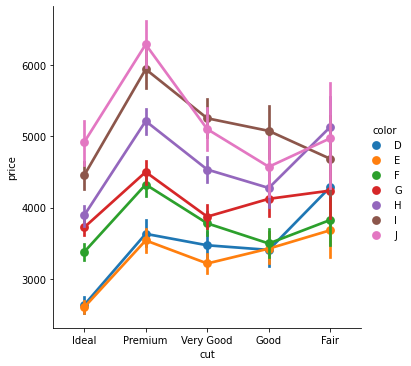

In [293]:
sns.catplot(x = "cut", y = "price", hue = "color", kind = "point", data = df);

In [294]:
#makine öğrenmesinde amacımız hedeflediğimiz bağımlı değişkende var olan bilgiyi var olan değişkkeni farklı değişkenlerce açıklamaktır. 
#bu değişimi farklı değişkenlerce açıklama amacı en büyük amacı veri seti içindeki hedef değişken hedefiyle değişkenlerin bulunmasıdır.
#aggregate edilmiş değerler y eksenidir

In [295]:
#Boxplot

In [296]:
#Veri Seri Hikayesi
"""
total_bill: yemek ve bahşiş toplamı
tip: bahşiş
sex: ücret ödeyen cinsiyeti
smoker: sigara içen
say: gün (3. thur 4. fri 5. sat 6. sun)
time: ne zaman 0. day 1. night
size: grup boyutu
"""

'\ntotal_bill: yemek ve bahşiş toplamı\ntip: bahşiş\nsex: ücret ödeyen cinsiyeti\nsmoker: sigara içen\nsay: gün (3. thur 4. fri 5. sat 6. sun)\ntime: ne zaman 0. day 1. night\nsize: grup boyutu\n'

In [297]:
tips = sns.load_dataset("tips")
df = tips.copy()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [298]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


In [299]:
df.sex.value_counts()

Male      157
Female     87
Name: sex, dtype: int64

In [300]:
df.smoker.value_counts()

No     151
Yes     93
Name: smoker, dtype: int64

In [301]:
df.time.value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

In [302]:
#Kutu Grafiğin Oluşturulması Bokplot

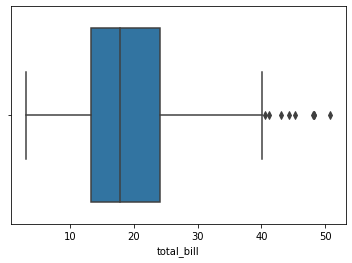

In [303]:
sns.boxplot(x = df.total_bill);#kartiller ile çok değerli bilgiler sunar

In [304]:
# ilk çizgi yüzde 25. değer ortadaki çubuk medyan değeri (yüzde 50) 3.çizgi yüzde 75. değer en sonki nokta maks değer
# aykırı gözlem incelemelerind bir değerin aykırı değer olarak tanımlanması için en çok lazım olacak göstergelerden biridir

In [305]:
#Kutu Grafik Çaprazlamalar

In [306]:
#hangi günler daha fazla kazanıyoruz

<AxesSubplot:xlabel='day', ylabel='total_bill'>

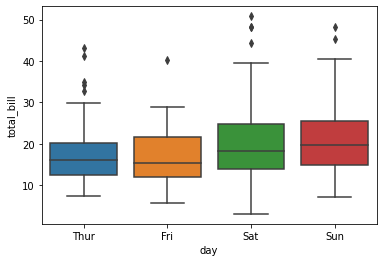

In [307]:
sns.boxplot(x = "day", y = "total_bill", data = df)

In [308]:
#pazar günü cumartesiden az insan gelmesine rağmen insanllar pazar daha fazla para harcıya

In [309]:
#sabahmı akşammı daha çok kazanıyrz

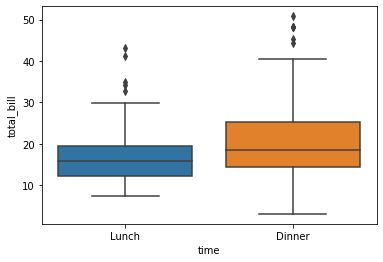

In [310]:
sns.boxplot(x = "time", y = "total_bill", data = df);

In [311]:
#günlere ait sabah akşam kazan kutu tablosu

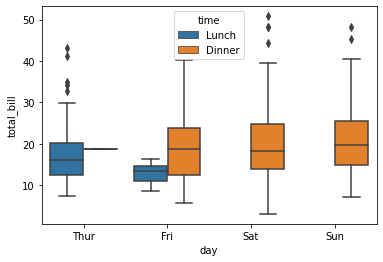

In [312]:
sns.boxplot(x = "day", y = "total_bill",  hue = "time", data = df);

In [313]:
#

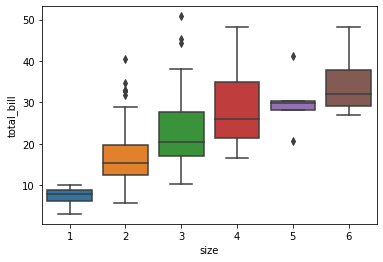

In [314]:
sns.boxplot(x = "size", y = "total_bill", data = df);

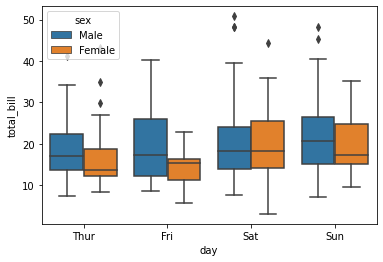

In [315]:
sns.boxplot(x = "day", y = "total_bill", hue ="sex" , data = df);

In [316]:
#Violin Grafiğin Oluşturulması

In [317]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


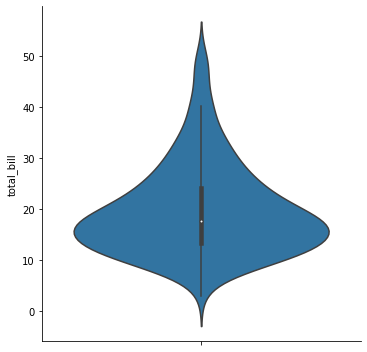

In [318]:
sns.catplot(y = "total_bill", kind = "violin", data = df)

In [319]:
#merkezi eğilim sunan bir grafiktir

In [320]:
#Violin Çaprazlamalar

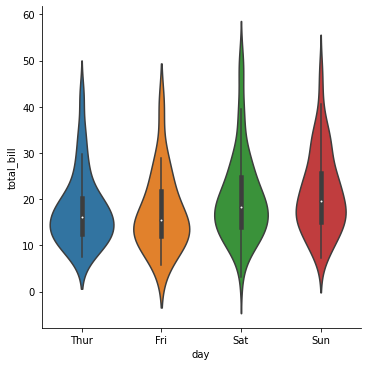

In [321]:
sns.catplot(x = "day", y = "total_bill", kind = "violin", data = df)

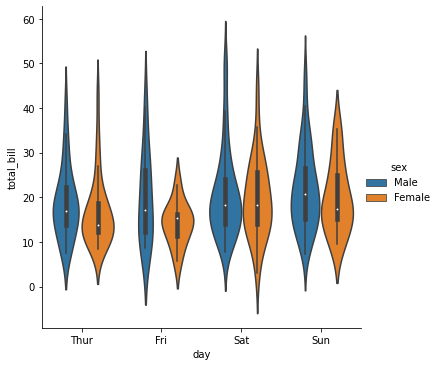

In [322]:
sns.catplot(x = "day", y = "total_bill", hue = "sex", kind = "violin", data = df)

In [324]:
#Korelasyon Grafiğinin Oluşturulması
#en çok bilinen scatterplot ikii sayısal veriyi karşılaştırır
#birlikte oluşturdukları yapıyı görücez öncekilerde çaprazlama yapıyoduk

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

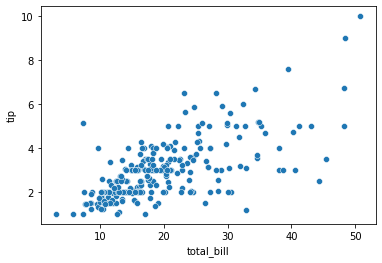

In [325]:
sns.scatterplot(x = "total_bill", y = "tip", data = df)# saçılım grafiği

In [326]:
#koralasyon değişkenler arasındaki ilişkiyi tanımlar

In [327]:
#Korelasyon Çaprazlamalar

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

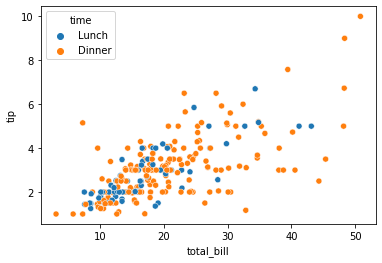

In [329]:
sns.scatterplot(x = "total_bill", y = "tip", hue = "time", data = df)

In [333]:
#bazı çaprazlamalar ile bu verinin nasıl oluştuğu anlaşılmaya çalışılmalıdır

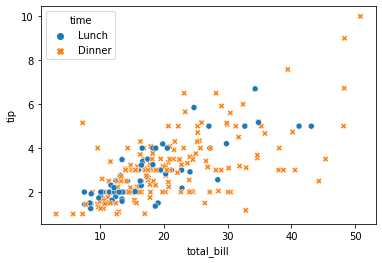

In [335]:
sns.scatterplot(x = "total_bill", y = "tip", hue = "time", style = "time", data = df);
#noktaların şeklini değiştirdi

In [336]:
?sns.scatterplot

Signature:
sns.scatterplot(
    *,
    x=None,
    y=None,
    hue=None,
    style=None,
    size=None,
    data=None,
    palette=None,
    hue_order=None,
    hue_norm=None,
    sizes=None,
    size_order=None,
    size_norm=None,
    markers=True,
    style_order=None,
    x_bins=None,
    y_bins=None,
    units=None,
    estimator=None,
    ci=95,
    n_boot=1000,
    alpha=None,
    x_jitter=None,
    y_jitter=None,
    legend='auto',
    ax=None,
    **kwargs,
)
Docstring:
Draw a scatter plot with possibility of several semantic groupings.

The relationship between ``x`` and ``y`` can be shown for different subsets
of the data using the ``hue``, ``size``, and ``style`` parameters. These
parameters control what visual semantics are used to identify the different
subsets. It is possible to show up to three dimensions independently by
using all three semantic types, but this style of plot can be hard to
interpret and is often ineffective. Using redundant semantics (i.e. both
``hue``

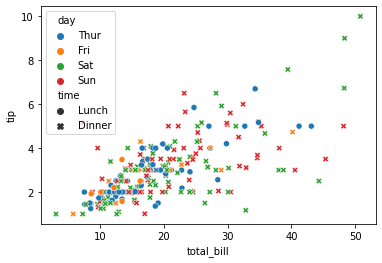

In [338]:
sns.scatterplot(x = "total_bill", y = "tip", hue = "day", style = "time", data = df);

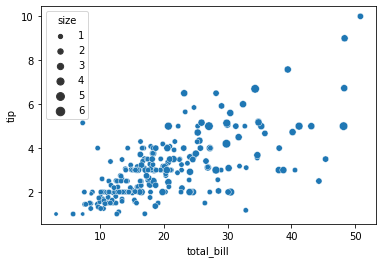

In [340]:
sns.scatterplot(x = "total_bill", y = "tip", size = "size", data = df);

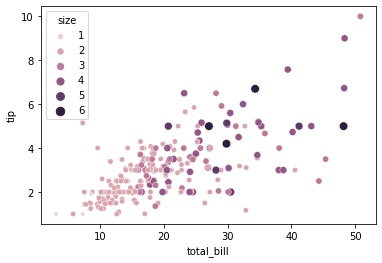

In [342]:
sns.scatterplot(x = "total_bill", y = "tip", hue = "size", size = "size", data = df);

In [343]:
#Doğrusal İlişkinin Gösterilmesi

In [344]:
import matplotlib.pyplot as plt

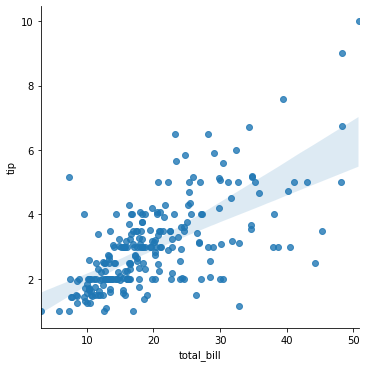

In [345]:
sns.lmplot(x = "total_bill", y = "tip", data = df)#lineer model kısaltması  

In [346]:
#açık renkli mavi sapmaları ifade eder

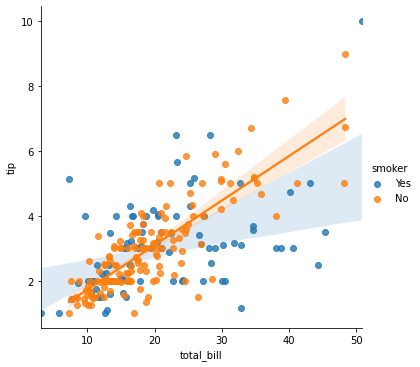

In [347]:
sns.lmplot(x = "total_bill", y = "tip", hue = "smoker", data = df) 

In [348]:
#eğim arttıkça fonksiyonel anlamda değerliyken bu eğim önemlidir
#çok şiddetli şekilde bahşişler artmaktadır (sigara içmeyenler için geçerlidir)

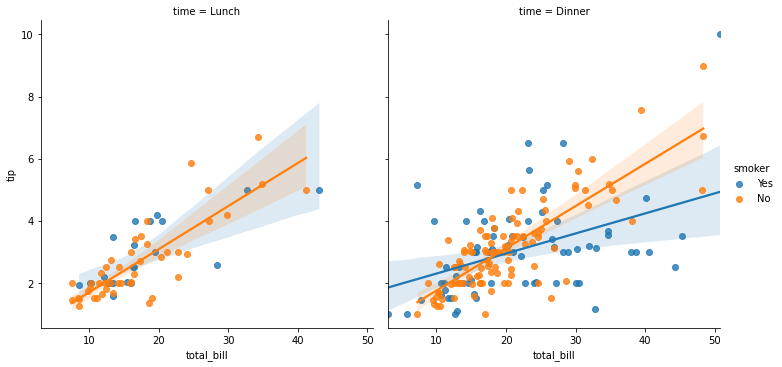

In [350]:
sns.lmplot(x = "total_bill", y = "tip", hue = "smoker", col = "time", data = df) 

#öğünlere göre eğimler farklıdır.

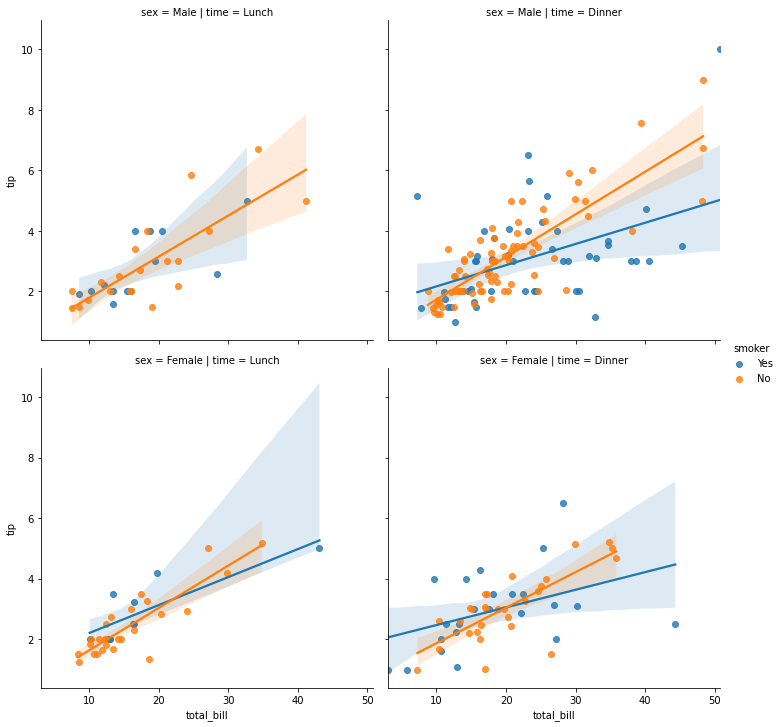

In [351]:
sns.lmplot(x = "total_bill", y = "tip", hue = "smoker", col = "time", row = "sex", data = df) 

In [352]:
#bu verileri tanıyıp algoritmalara gönderdiğimizde algoritmanın 
#bulacak olduğu ayrıştırmalar
#açıklayacak olduğu değişkenlerin nasıl olduğuna hakim olucaz

In [353]:
#Scatter Plot Matrisi

In [354]:
iris = sns.load_dataset("iris")
df = iris.copy()
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [355]:
#veri seti hikayes
#çiçek türleri verileri
#çanakyaprak - yükseklik geniişlikk 
#taçyaprak - yyükseklik genişlik
#türler

In [356]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


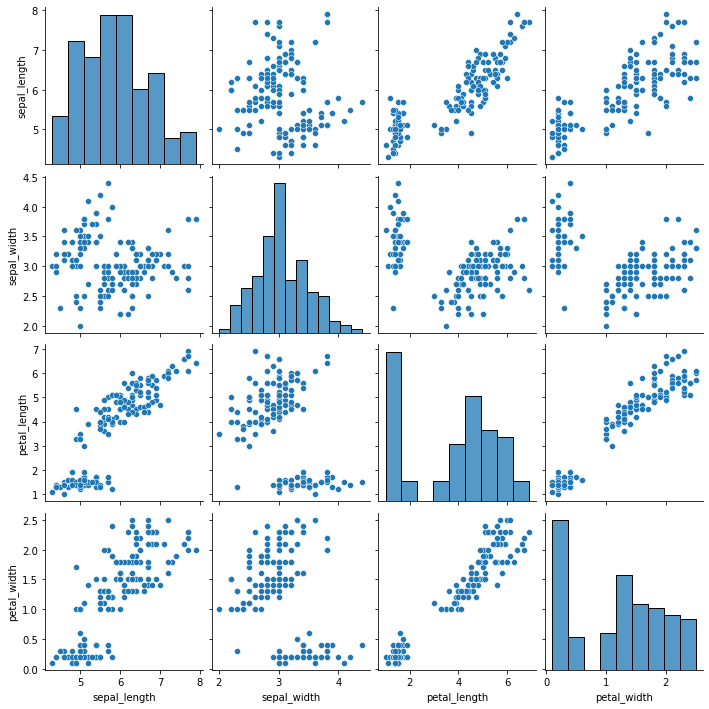

In [358]:
sns.pairplot(df)

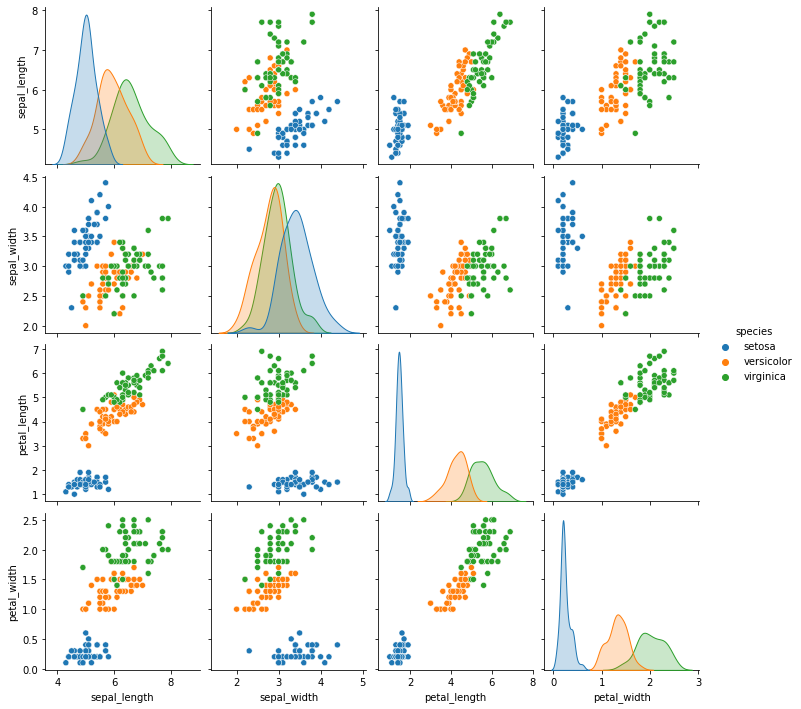

In [360]:
sns.pairplot(df, hue = "species")

In [361]:
#aralarındaki değişkenliklerini türler değişkeniyle ele almalıyız
#

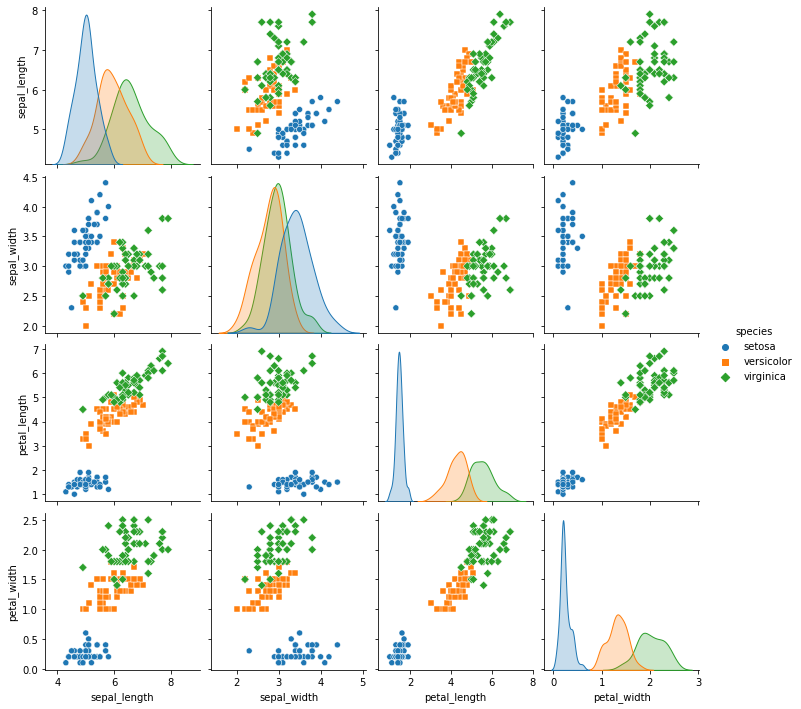

In [362]:
sns.pairplot(df, hue = "species", markers = ["o","s","D"])

In [363]:
#grafiğe doppğrı ekleme

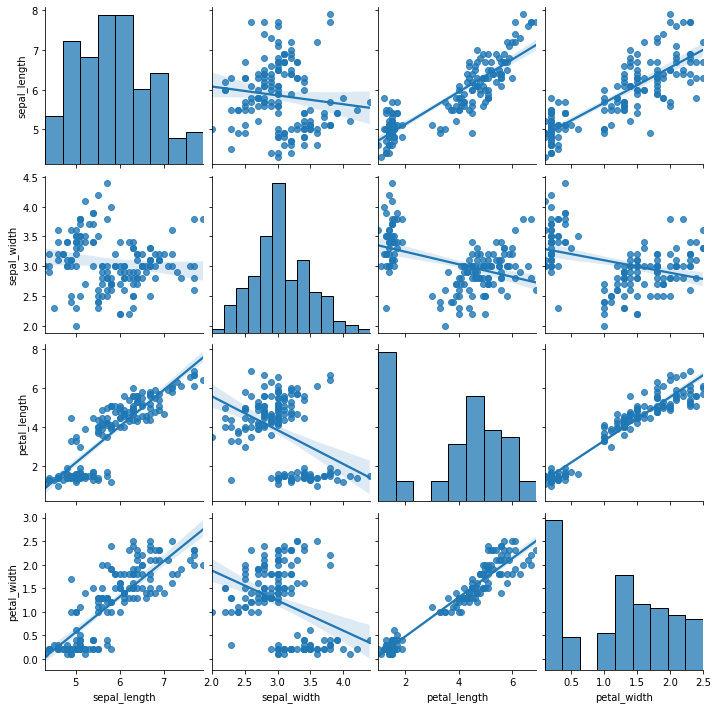

In [364]:
sns.pairplot(df, kind = "reg")

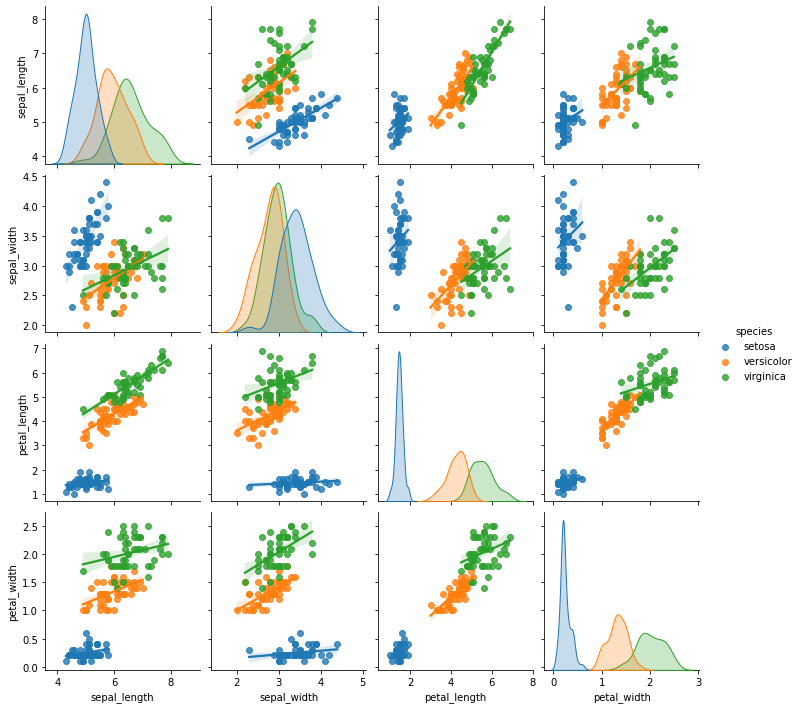

In [365]:
sns.pairplot(df, hue ="species", kind = "reg")

In [366]:
#Isı Haritası (Heat Map) yıl ay gibi zaman değişkenlerinde kullanılır

In [368]:
flights = sns.load_dataset("flights")
df = flights.copy()
df.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [369]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB


In [370]:
df.passengers.describe()

count    144.000000
mean     280.298611
std      119.966317
min      104.000000
25%      180.000000
50%      265.500000
75%      360.500000
max      622.000000
Name: passengers, dtype: float64

In [371]:
#zamana bağlı yorumlamaları ona göre karar veermeliyiz

In [376]:
df = df.pivot("month","year","passengers")#pivot hale getirirz güzel okunması için

KeyError: 'month'

In [377]:
df

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


<AxesSubplot:xlabel='year', ylabel='month'>

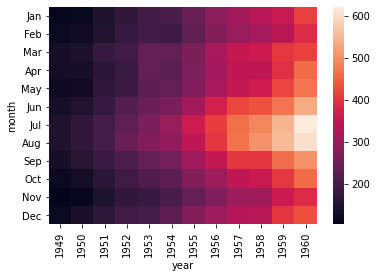

In [378]:
sns.heatmap(df)

<AxesSubplot:xlabel='year', ylabel='month'>

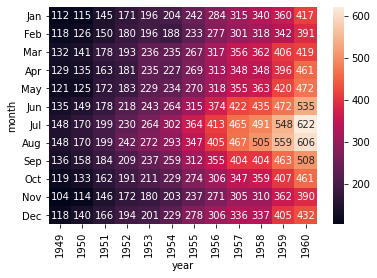

In [381]:
sns.heatmap(df, annot = True, fmt = "d")#hücreleri sayılarla doldurma

<AxesSubplot:xlabel='year', ylabel='month'>

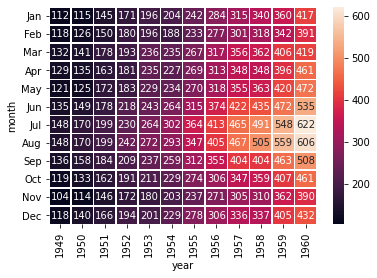

In [382]:
sns.heatmap(df, annot = True, fmt = "d", linewidths = .5)

<AxesSubplot:xlabel='year', ylabel='month'>

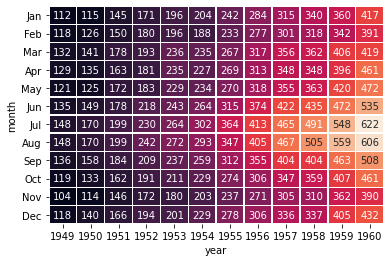

In [383]:
sns.heatmap(df, annot = True, fmt = "d", linewidths = .5, cbar = False)

In [384]:
fmri = sns.load_dataset("fmri")
df = fmri.copy()
df.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


In [385]:
#diğerlerine göre daha zor zamana baplı ve makinlerin oluşturduğu verileri görselleştirme

In [387]:
#Veri Seti Hikayesi
#beyne bağlanan bir cihaza gelen sinyallerin verisi
#subject kişiler
#time point zaman noktalar
#event olayları
#region sinyalin toplandığı bölge
#signal gelen sinyali ifade ediyor

In [388]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1064 entries, 0 to 1063
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   subject    1064 non-null   object 
 1   timepoint  1064 non-null   int64  
 2   event      1064 non-null   object 
 3   region     1064 non-null   object 
 4   signal     1064 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 41.7+ KB


In [389]:
df.describe()

,timepoint,signal
count,1064.000000,1064.000000
mean,9.000000,0.003540
std,5.479801,0.093930
min,0.000000,-0.255486
25%,4.000000,-0.046070
50%,9.000000,-0.013653
75%,14.000000,0.024293
max,18.000000,0.564985


In [390]:
#amacımız zaman noktalarına sinyalin durumunu görselleştirme diğer verileride çaprazlmayla ekleme

In [391]:
df.timepoint.describe()

count    1064.000000
mean        9.000000
std         5.479801
min         0.000000
25%         4.000000
50%         9.000000
75%        14.000000
max        18.000000
Name: timepoint, dtype: float64

In [392]:
df.signal.describe()

count    1064.000000
mean        0.003540
std         0.093930
min        -0.255486
25%        -0.046070
50%        -0.013653
75%         0.024293
max         0.564985
Name: signal, dtype: float64

In [396]:
df.groupby("timepoint")["signal"].count()
#her zman bölgesinde aynı sayıda örnek alınmış

timepoint
0     56
1     56
2     56
3     56
4     56
5     56
6     56
7     56
8     56
9     56
10    56
11    56
12    56
13    56
14    56
15    56
16    56
17    56
18    56
Name: signal, dtype: int64

In [399]:
df.groupby("signal").count()#1064 taje değer çıktı her sinyal eşiszdir

,subject,timepoint,event,region
signal,,,,
-0.255486,1,1,1,1
-0.238474,1,1,1,1
-0.224351,1,1,1,1
-0.181241,1,1,1,1
-0.178510,1,1,1,1
...,...,...,...,...
0.455575,1,1,1,1
0.460896,1,1,1,1
0.476055,1,1,1,1


In [400]:
df.groupby("timepoint")["signal"].describe()

,count,mean,std,min,25%,50%,75%,max
timepoint,,,,,,,,
0,56.0,-0.016662,0.028326,-0.064454,-0.039169,-0.018382,0.003539,0.074399
1,56.0,-0.025002,0.030641,-0.082174,-0.046299,-0.024533,-0.005388,0.063558
2,56.0,-0.012873,0.035440,-0.110565,-0.034944,-0.013183,0.009318,0.077277
3,56.0,0.034446,0.058260,-0.089708,-0.001157,0.028430,0.061840,0.185581
4,56.0,0.098194,0.092838,-0.046347,0.030912,0.070166,0.144911,0.346775
5,56.0,0.137725,0.123353,-0.017946,0.042762,0.096535,0.211638,0.476055
6,56.0,0.127515,0.137332,-0.054405,0.022409,0.068850,0.218919,0.564985
7,56.0,0.075660,0.129704,-0.108222,-0.016252,0.032486,0.144781,0.494787
8,56.0,0.013420,0.104216,-0.181241,-0.049453,-0.012834,0.030396,0.337143


In [401]:
#her bölgenin stnadar sapması farklı ve farklılaşıyor

In [402]:
#yapısal bir veri seti var mekaniktir

In [403]:
#Çizgi Grafiği Oluşturulması

<AxesSubplot:xlabel='timepoint', ylabel='signal'>

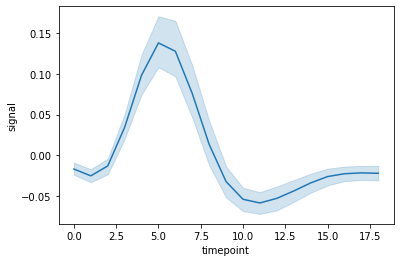

In [404]:
sns.lineplot(x = "timepoint", y = "signal", data = df)

In [405]:
#zaman noktalarına sinyallerin artış azalını sunmuştur

In [406]:
#açık maviler standart sapmalarla oluşturulmuş güven aralıkları
#bazı noktalarda daralmıştır bazı noktalarda artmıştır

In [407]:
#mavi çizgiler ortalama değerlerdir gözlemlerin ortlamasındr

In [408]:
#ilk görselleştirme yanıltıcı olabilir

<AxesSubplot:xlabel='timepoint', ylabel='signal'>

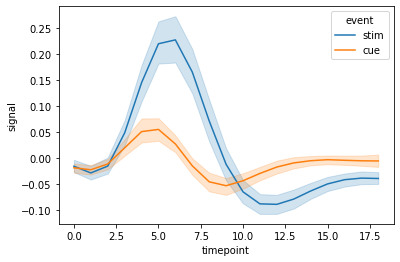

In [409]:
sns.lineplot(x = "timepoint",  y = "signal", hue ="event", data = df)

In [410]:
#aşağı ve yukarki pic noktaları stim eventinden kaynaklıdır

<AxesSubplot:xlabel='timepoint', ylabel='signal'>

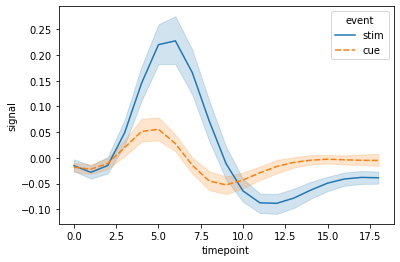

In [413]:
sns.lineplot(x = "timepoint",  y = "signal", hue ="event", style = "event", data = df)

<AxesSubplot:xlabel='timepoint', ylabel='signal'>

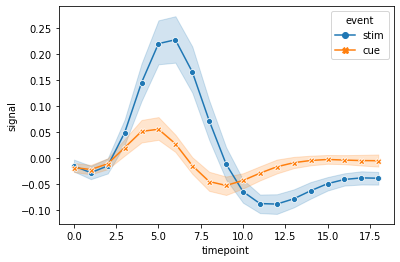

In [415]:
sns.lineplot(x = "timepoint",  
             y = "signal", 
             hue ="event", 
             style = "event",
             markers = True,
             dashes = False,
             data = df)

<AxesSubplot:xlabel='timepoint', ylabel='signal'>

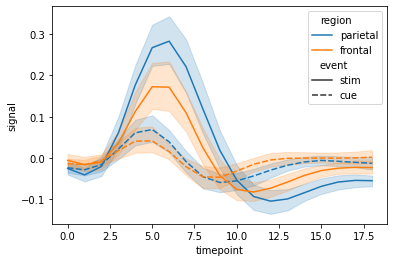

In [416]:
sns.lineplot(x = "timepoint",  
             y = "signal", 
             hue ="region",
             style = "event",
             data = df)

In [417]:
#Basit Zaman Serisi Grafiği

In [418]:
import pandas_datareader as pr

In [419]:
#veri seti hikayesi apple ın hisse senedi değerleri zamana bağlı

In [420]:
df = pr.get_data_yahoo("AAPL",start = "2016-01-01", end = "2020-08-31")

In [421]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,26.342501,25.500000,25.652500,26.337500,270597600.0,24.443037
2016-01-05,26.462500,25.602501,26.437500,25.677500,223164000.0,23.830513
2016-01-06,25.592501,24.967501,25.139999,25.174999,273829600.0,23.364161
2016-01-07,25.032499,24.107500,24.670000,24.112499,324377600.0,22.378082
2016-01-08,24.777500,24.190001,24.637501,24.240000,283192000.0,22.496408


In [422]:
#bir zman serisi veris

In [423]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1174 entries, 2016-01-04 to 2020-08-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1174 non-null   float64
 1   Low        1174 non-null   float64
 2   Open       1174 non-null   float64
 3   Close      1174 non-null   float64
 4   Volume     1174 non-null   float64
 5   Adj Close  1174 non-null   float64
dtypes: float64(6)
memory usage: 64.2 KB


In [424]:
kapanis = df.Close

In [426]:
kapanis.head()

Date
2016-01-04    26.337500
2016-01-05    25.677500
2016-01-06    25.174999
2016-01-07    24.112499
2016-01-08    24.240000
Name: Close, dtype: float64

<AxesSubplot:xlabel='Date'>

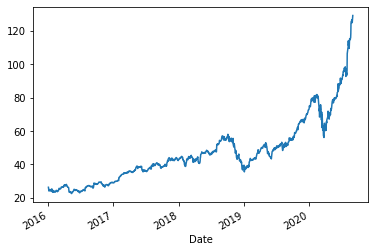

In [427]:
kapanis.plot();

In [428]:
#zman verisine çevirme

In [429]:
kapanis.index

DatetimeIndex(['2016-01-04', '2016-01-05', '2016-01-06', '2016-01-07',
               '2016-01-08', '2016-01-11', '2016-01-12', '2016-01-13',
               '2016-01-14', '2016-01-15',
               ...
               '2020-08-18', '2020-08-19', '2020-08-20', '2020-08-21',
               '2020-08-24', '2020-08-25', '2020-08-26', '2020-08-27',
               '2020-08-28', '2020-08-31'],
              dtype='datetime64[ns]', name='Date', length=1174, freq=None)

In [430]:
kapanis.index = pd.DatetimeIndex(kapanis.index)

In [431]:
kapanis.head()

Date
2016-01-04    26.337500
2016-01-05    25.677500
2016-01-06    25.174999
2016-01-07    24.112499
2016-01-08    24.240000
Name: Close, dtype: float64

<AxesSubplot:xlabel='Date'>

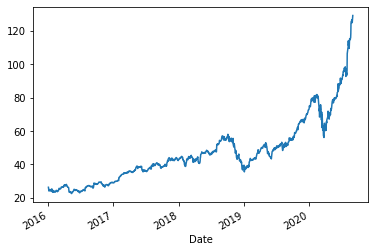

In [437]:
kapanis.plot()